In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [2]:
#load cleaned dataset
df = pd.read_csv("../data/processed/cleaned_news.csv")

In [3]:
df.head()

,title,text,label
0,breaking gop chairman grassley enough demand t...,donald trump white house chaos trying cover ru...,0
1,failed gop candidate remembered hilarious mock...,donald trump presumptive gop nominee time reme...,0
2,mike pences new dc neighbor hilariously trolli...,mike penny huge homophobe support exgay conver...,0
3,california ag pledge defend birth control insu...,san francisco reuters california attorney gene...,1
4,az rancher living usmexico border destroy nanc...,twisted reasoning come pelosi day especially p...,0


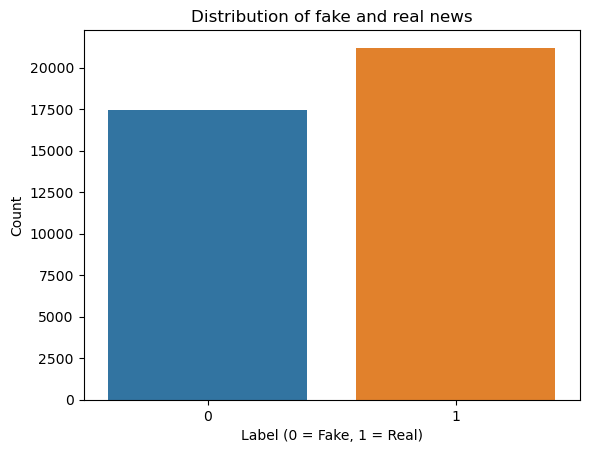

In [4]:
#plot class distribution
sns.countplot(data = df, x = "label")
plt.title("Distribution of fake and real news")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.show()

In [5]:
df["label"].value_counts()

label
1    21196
0    17461
Name: count, dtype: int64

In [6]:
df["text_length"] = df["text"].apply(len)

In [7]:
df.head()

,title,text,label,text_length
0,breaking gop chairman grassley enough demand t...,donald trump white house chaos trying cover ru...,0,1322
1,failed gop candidate remembered hilarious mock...,donald trump presumptive gop nominee time reme...,0,1831
2,mike pences new dc neighbor hilariously trolli...,mike penny huge homophobe support exgay conver...,0,1623
3,california ag pledge defend birth control insu...,san francisco reuters california attorney gene...,1,481
4,az rancher living usmexico border destroy nanc...,twisted reasoning come pelosi day especially p...,0,523


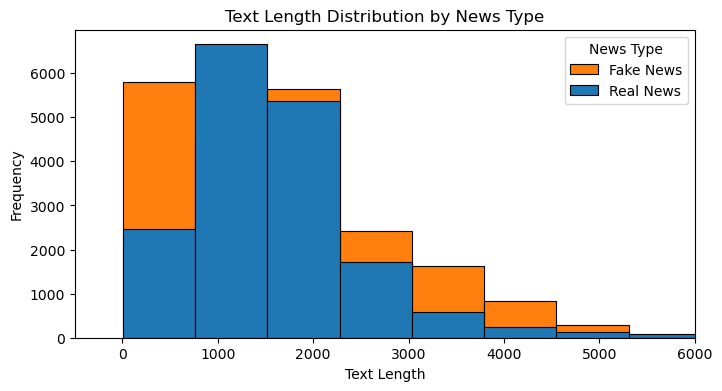

In [8]:
#Analyse text length
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="text_length", hue="label", bins=50, multiple="layer", alpha=1)

# Customize the x-axis
plt.xticks(ticks=range(0, 7000, 1000))
plt.xlim(-500, 6000) 

# Labels and title
plt.title("Text Length Distribution by News Type")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend(title="News Type", labels=["Fake News", "Real News"])

plt.show()

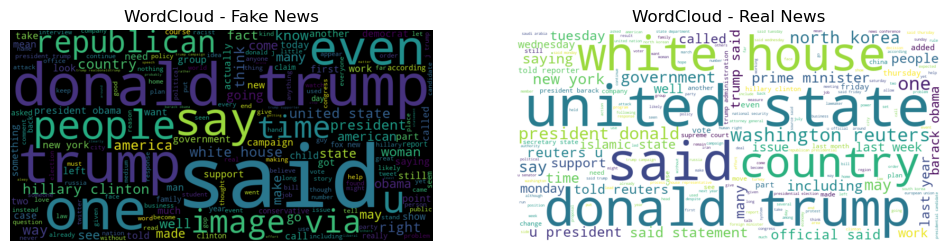

In [9]:
fake_text = " ".join(df[df['label'] == 0]['text'])
real_text = " ".join(df[df['label'] == 1]['text'])

# Generate WordClouds
fake_wc = WordCloud(width=800, height=400, background_color="black").generate(fake_text)
real_wc = WordCloud(width=800, height=400, background_color="white").generate(real_text)

# Plot WordClouds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Fake News")

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Real News")

plt.show()


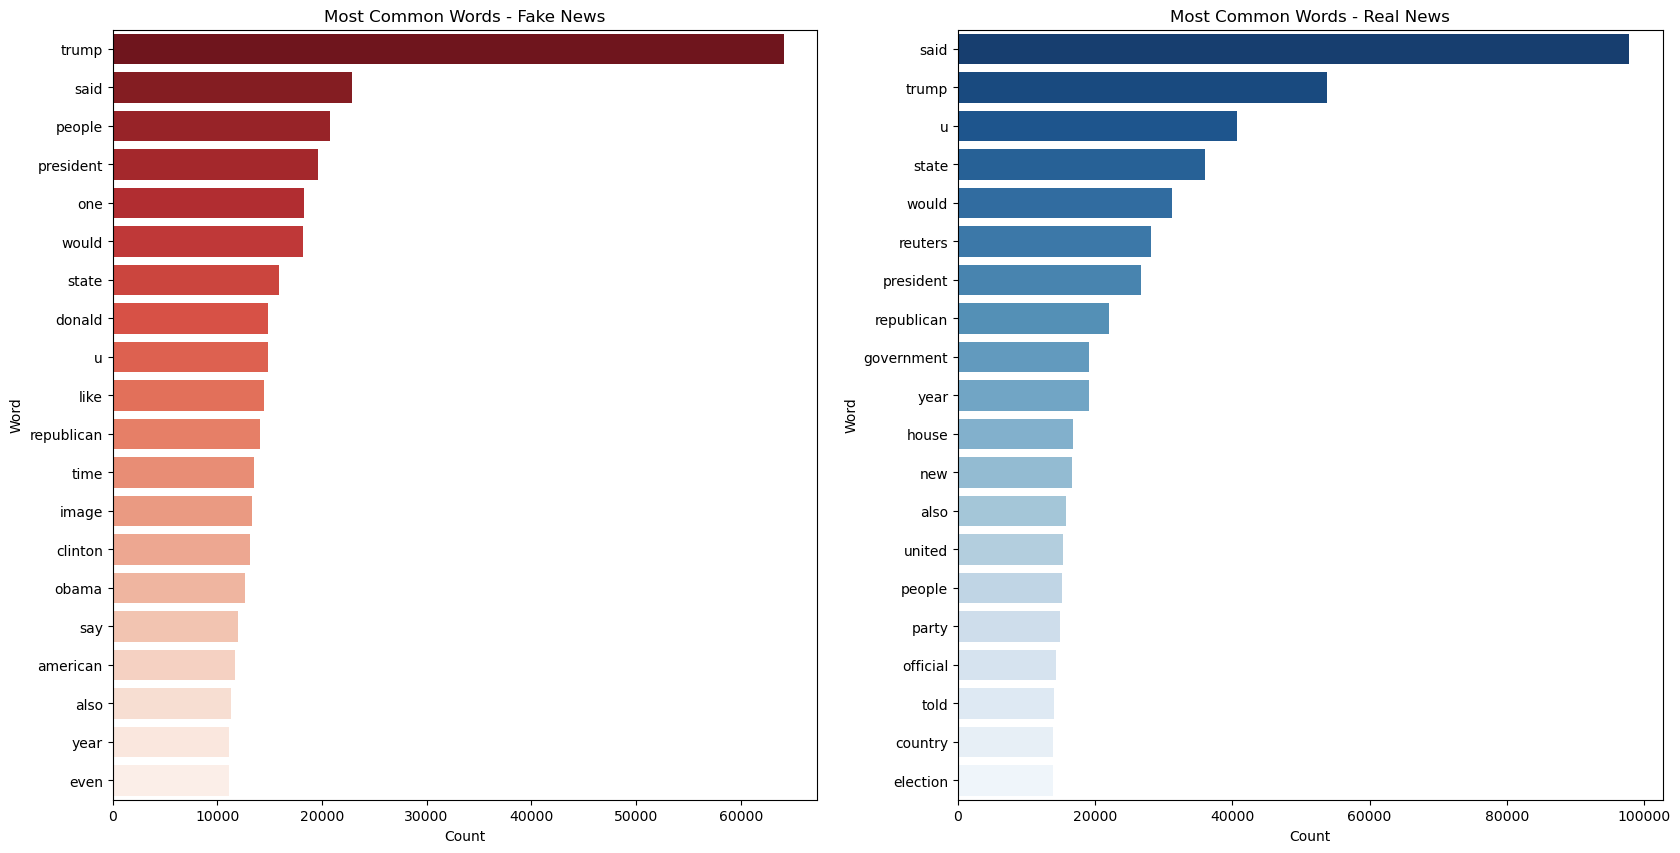

In [10]:
fake_words = fake_text.split()
real_words = real_text.split()

# Get most common words
fake_common = Counter(fake_words).most_common(20)
real_common = Counter(real_words).most_common(20)

# Convert to DataFrame
fake_common_df = pd.DataFrame(fake_common, columns=["Word", "Count"])
real_common_df = pd.DataFrame(real_common, columns=["Word", "Count"])

# Plot common words
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(data=fake_common_df, x="Count", y="Word", ax=ax[0], palette="Reds_r")
ax[0].set_title("Most Common Words - Fake News")

sns.barplot(data=real_common_df, x="Count", y="Word", ax=ax[1], palette="Blues_r")
ax[1].set_title("Most Common Words - Real News")

plt.show()